0.5239920995930099
0.407881254488869


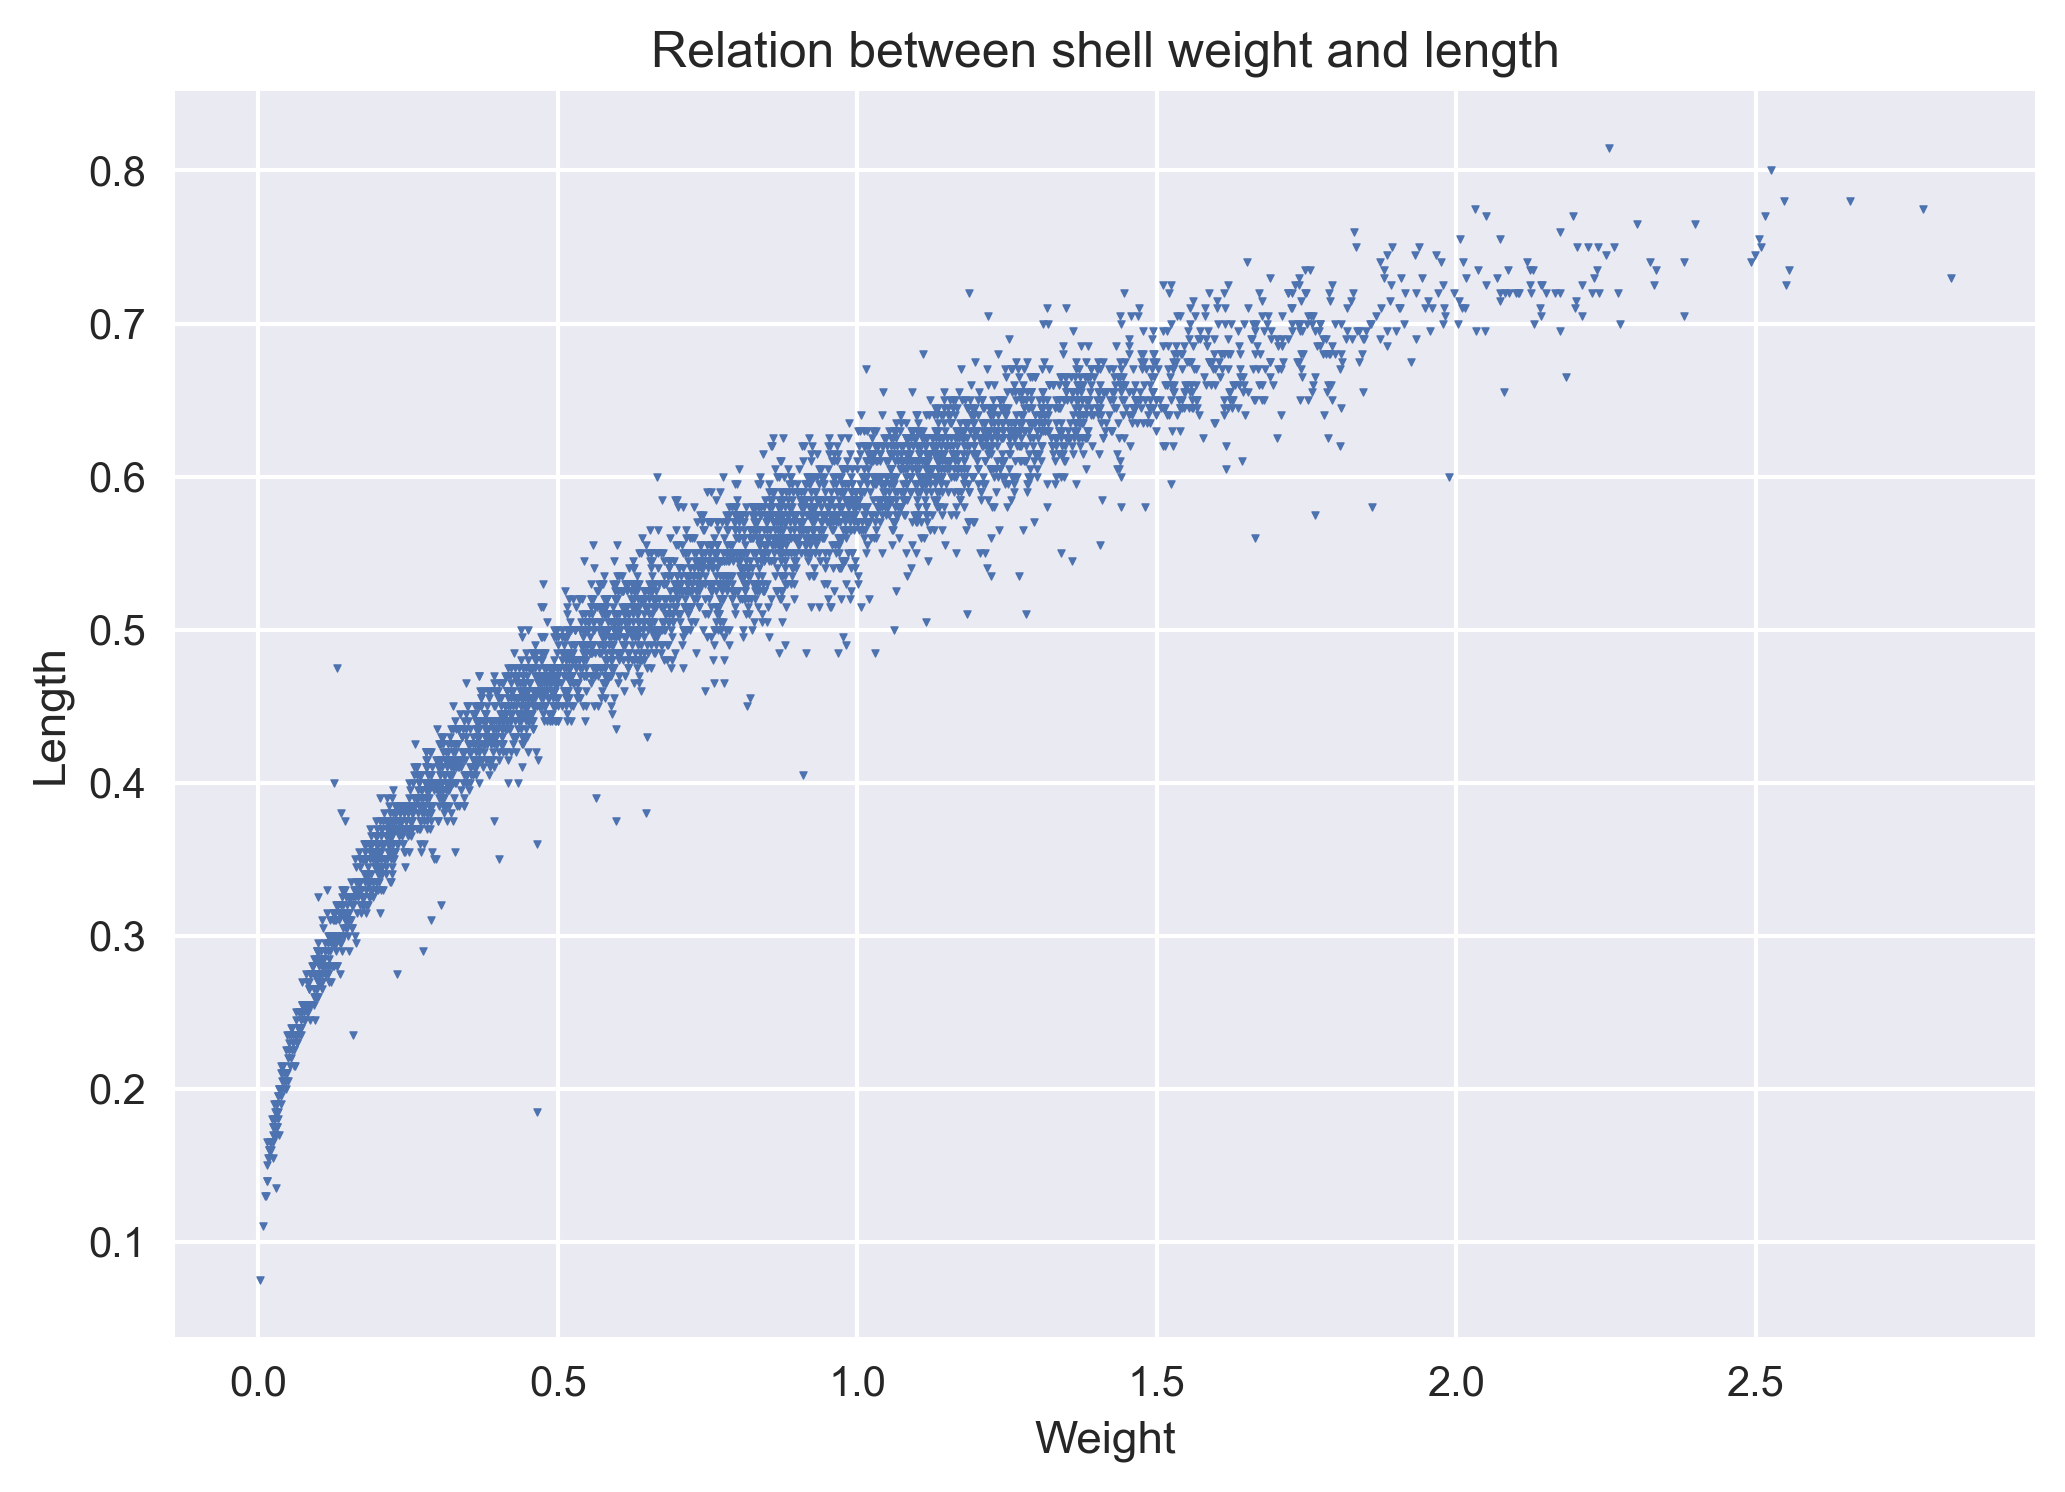

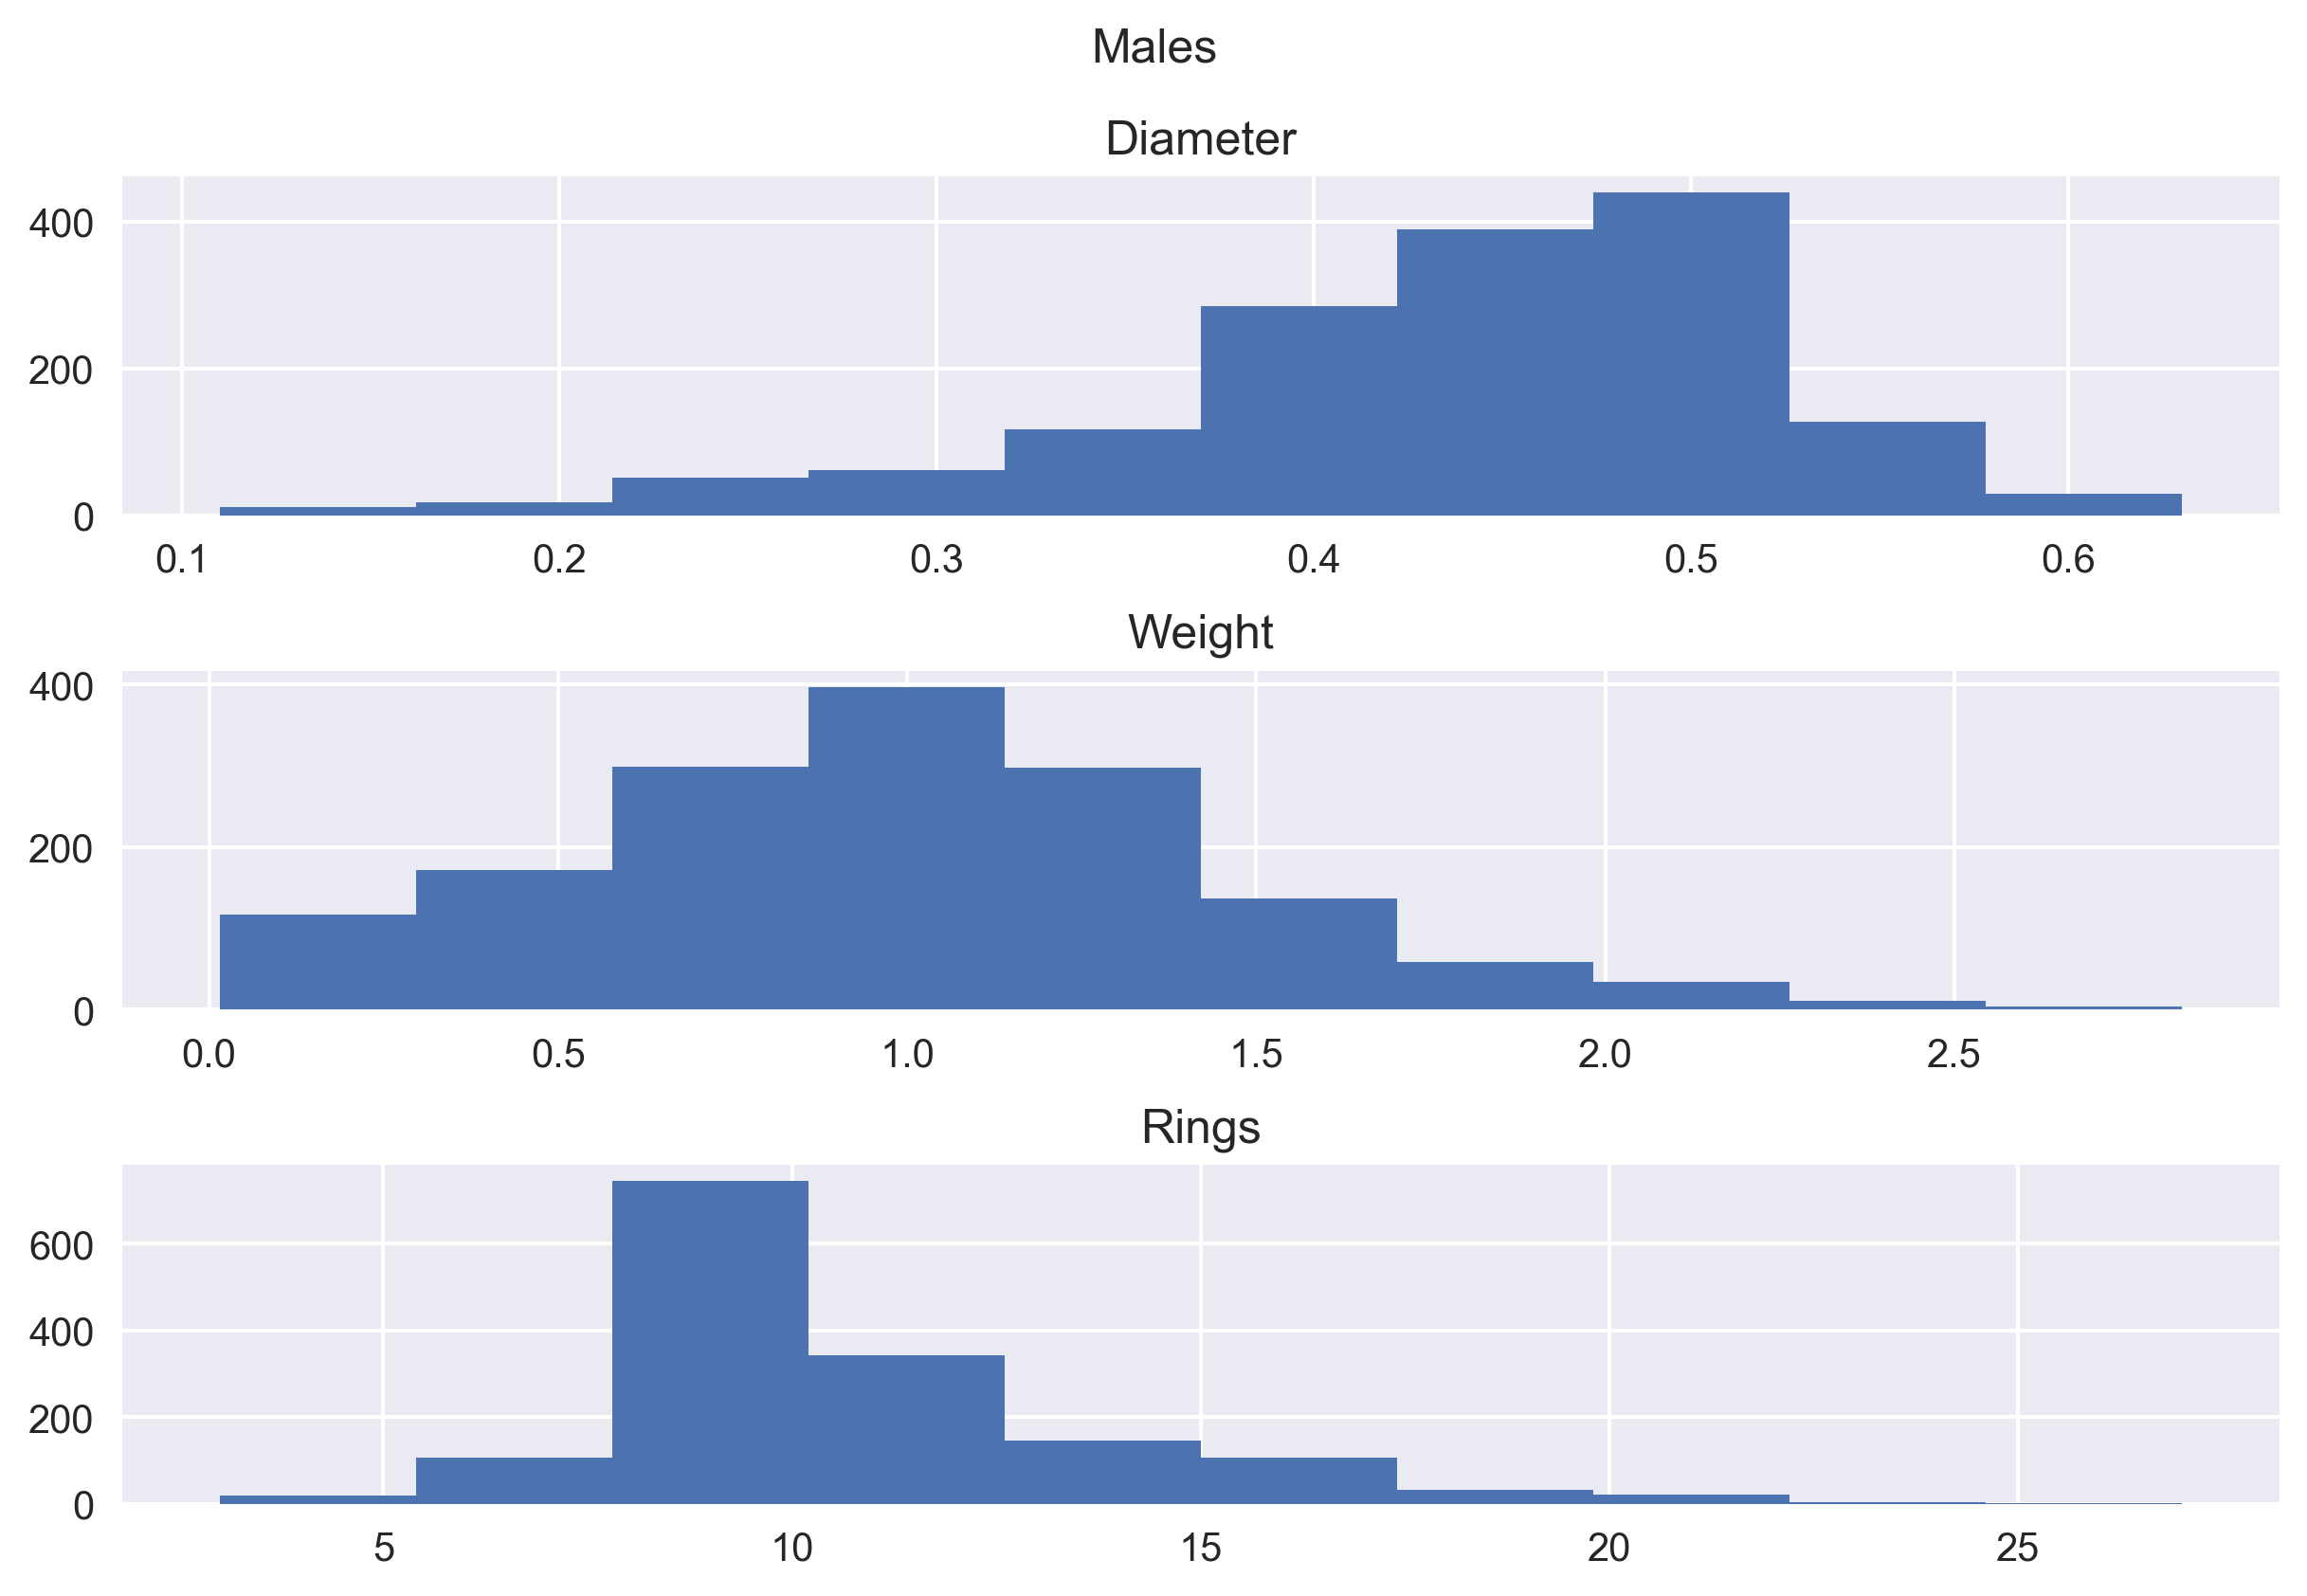

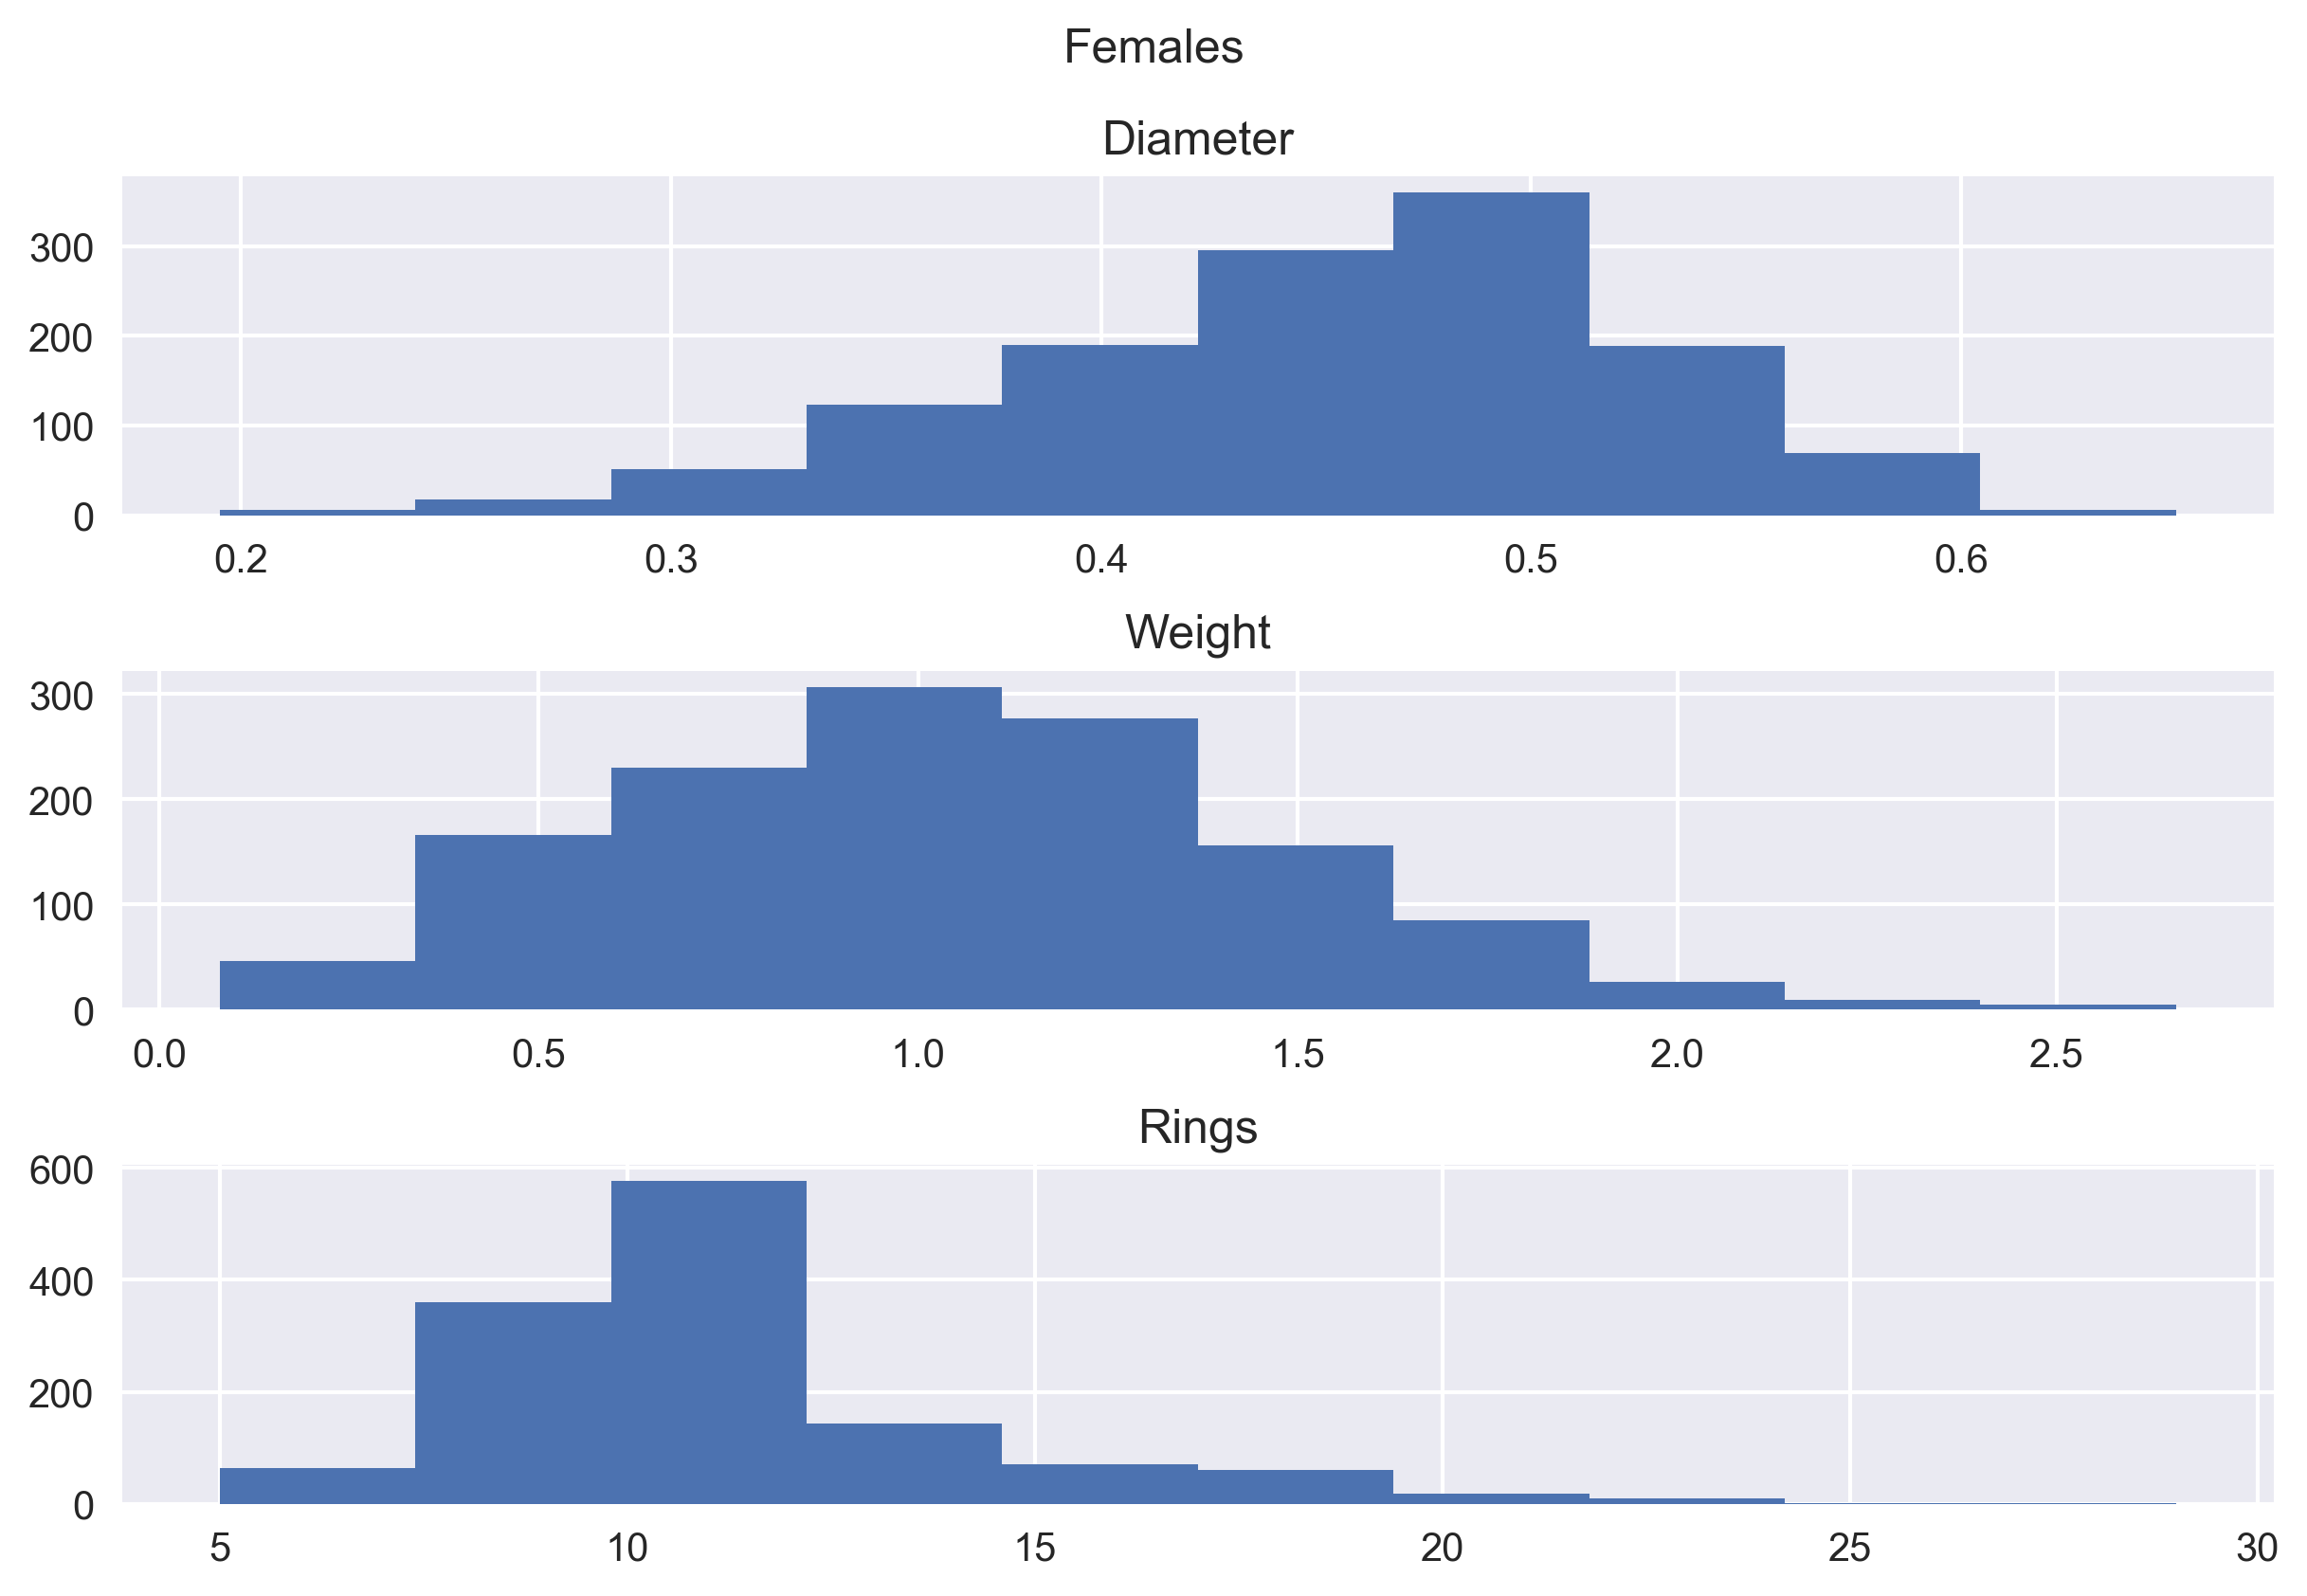

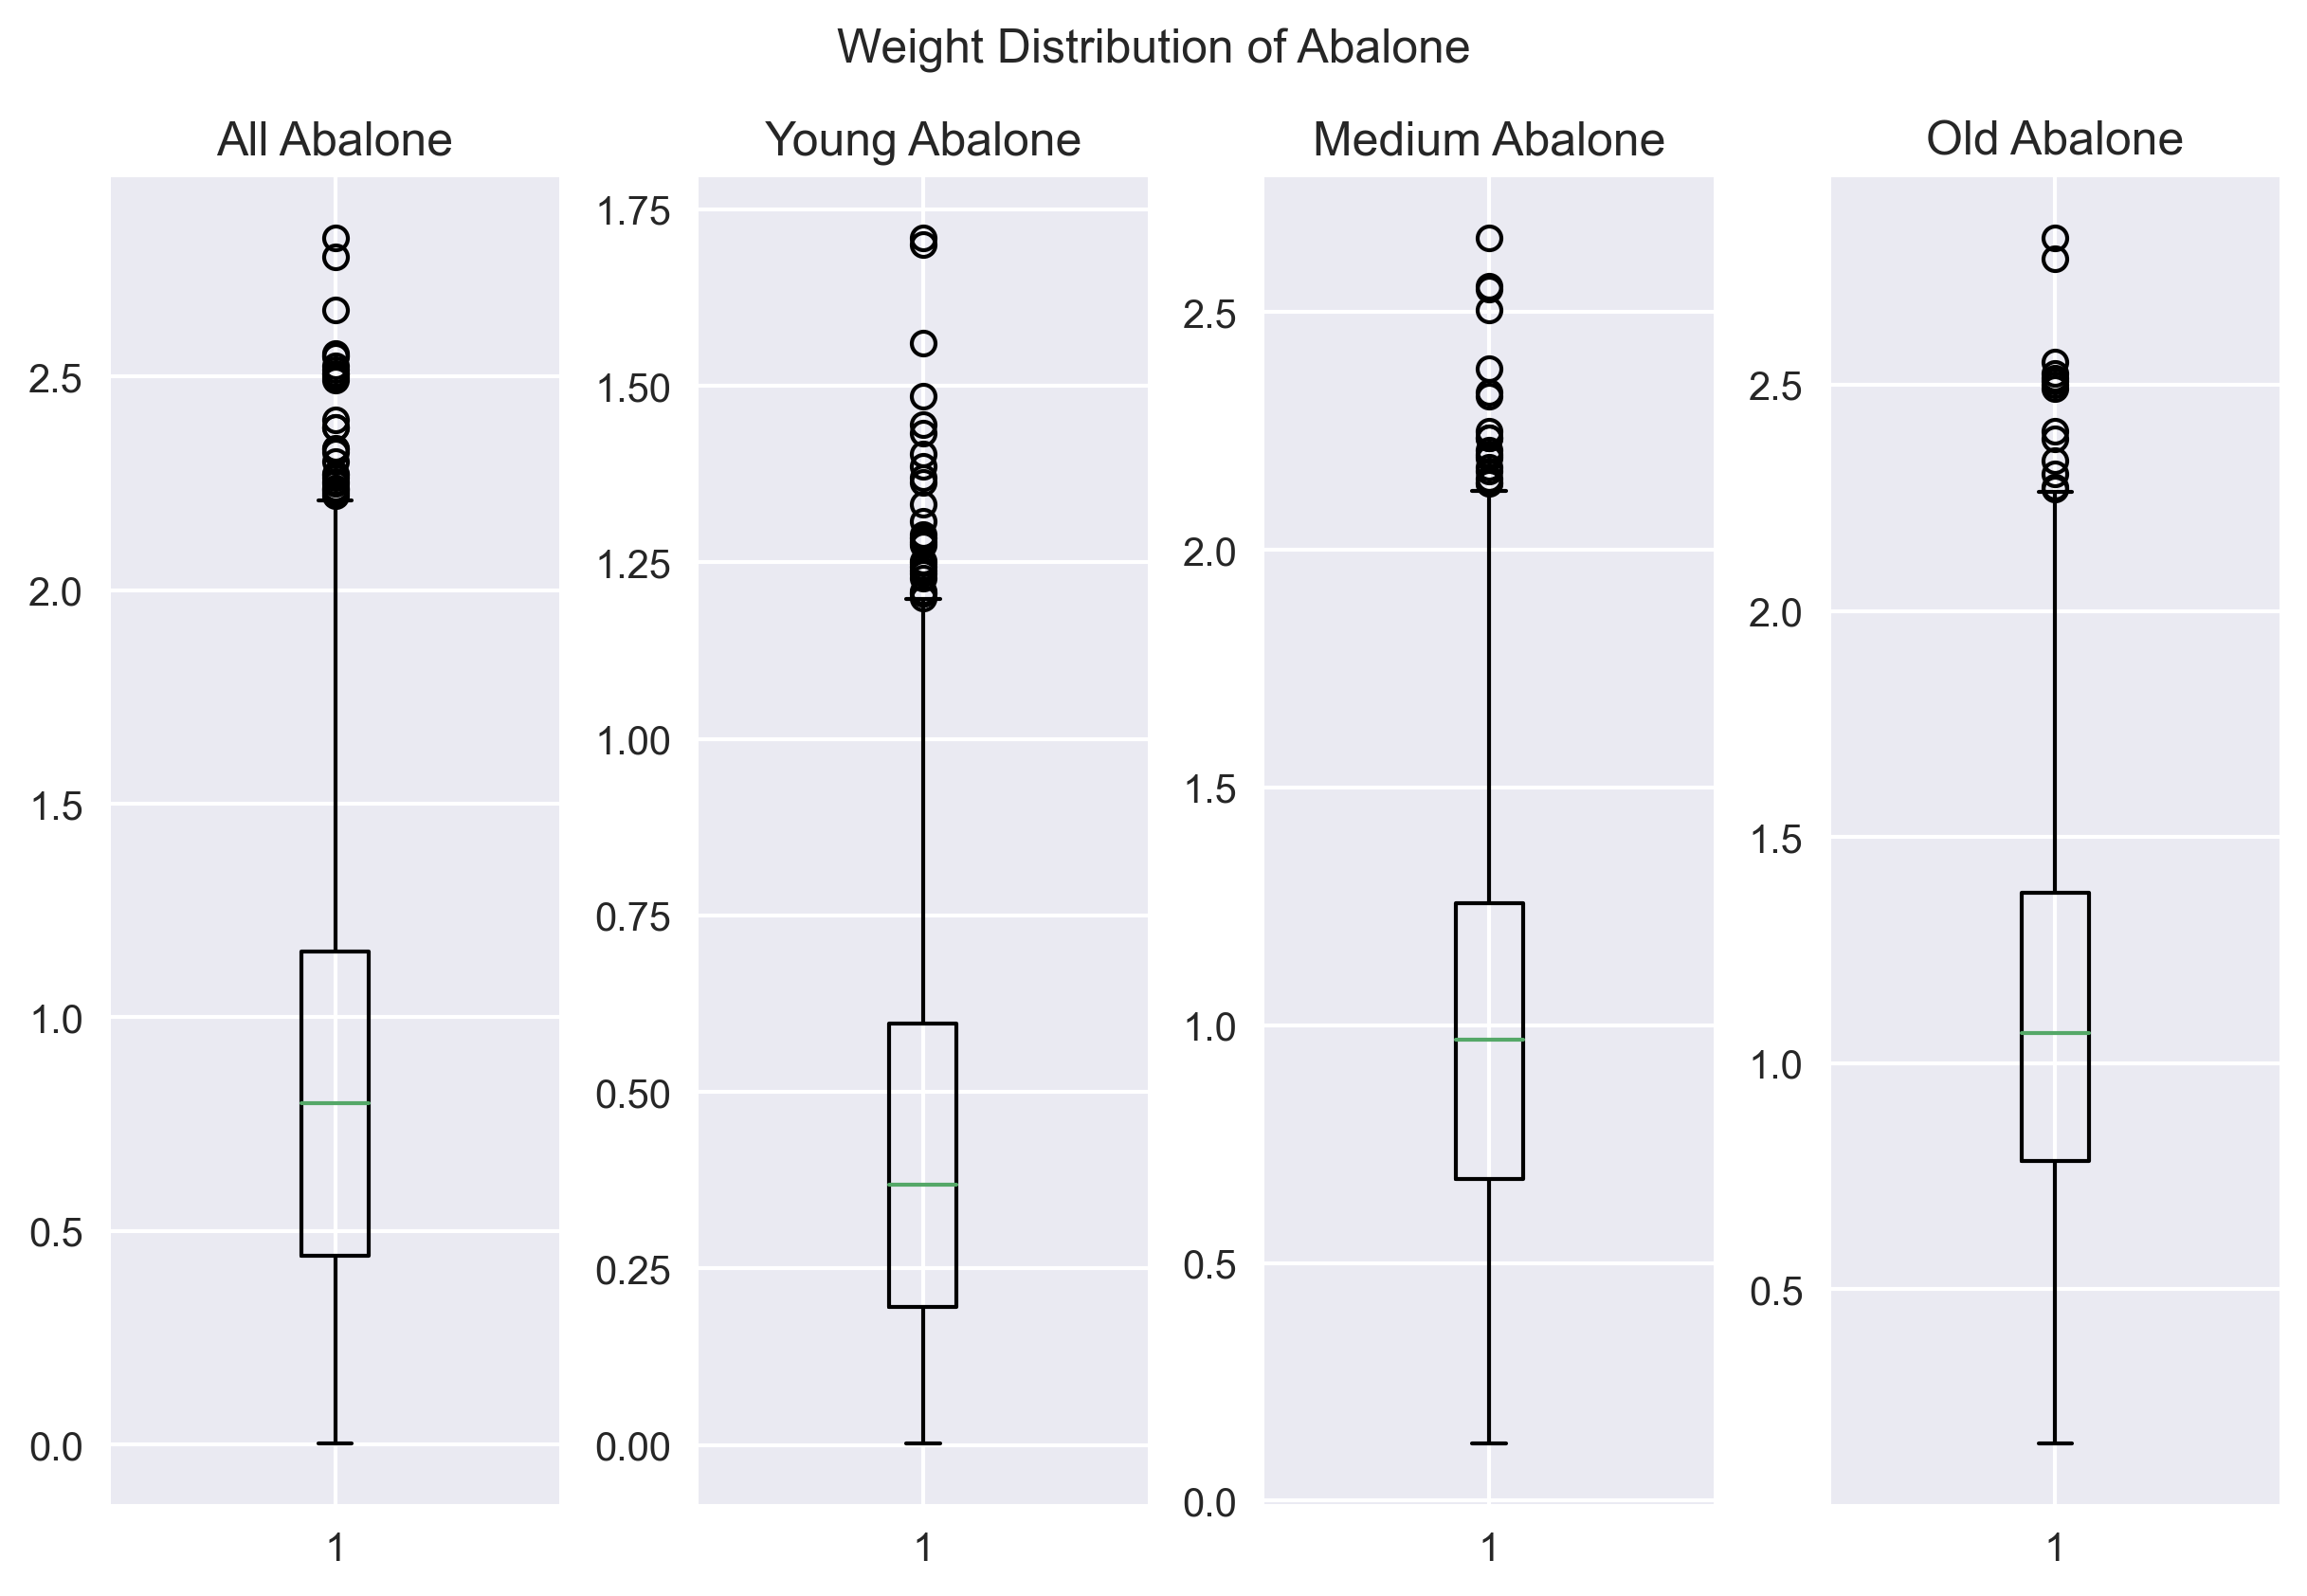

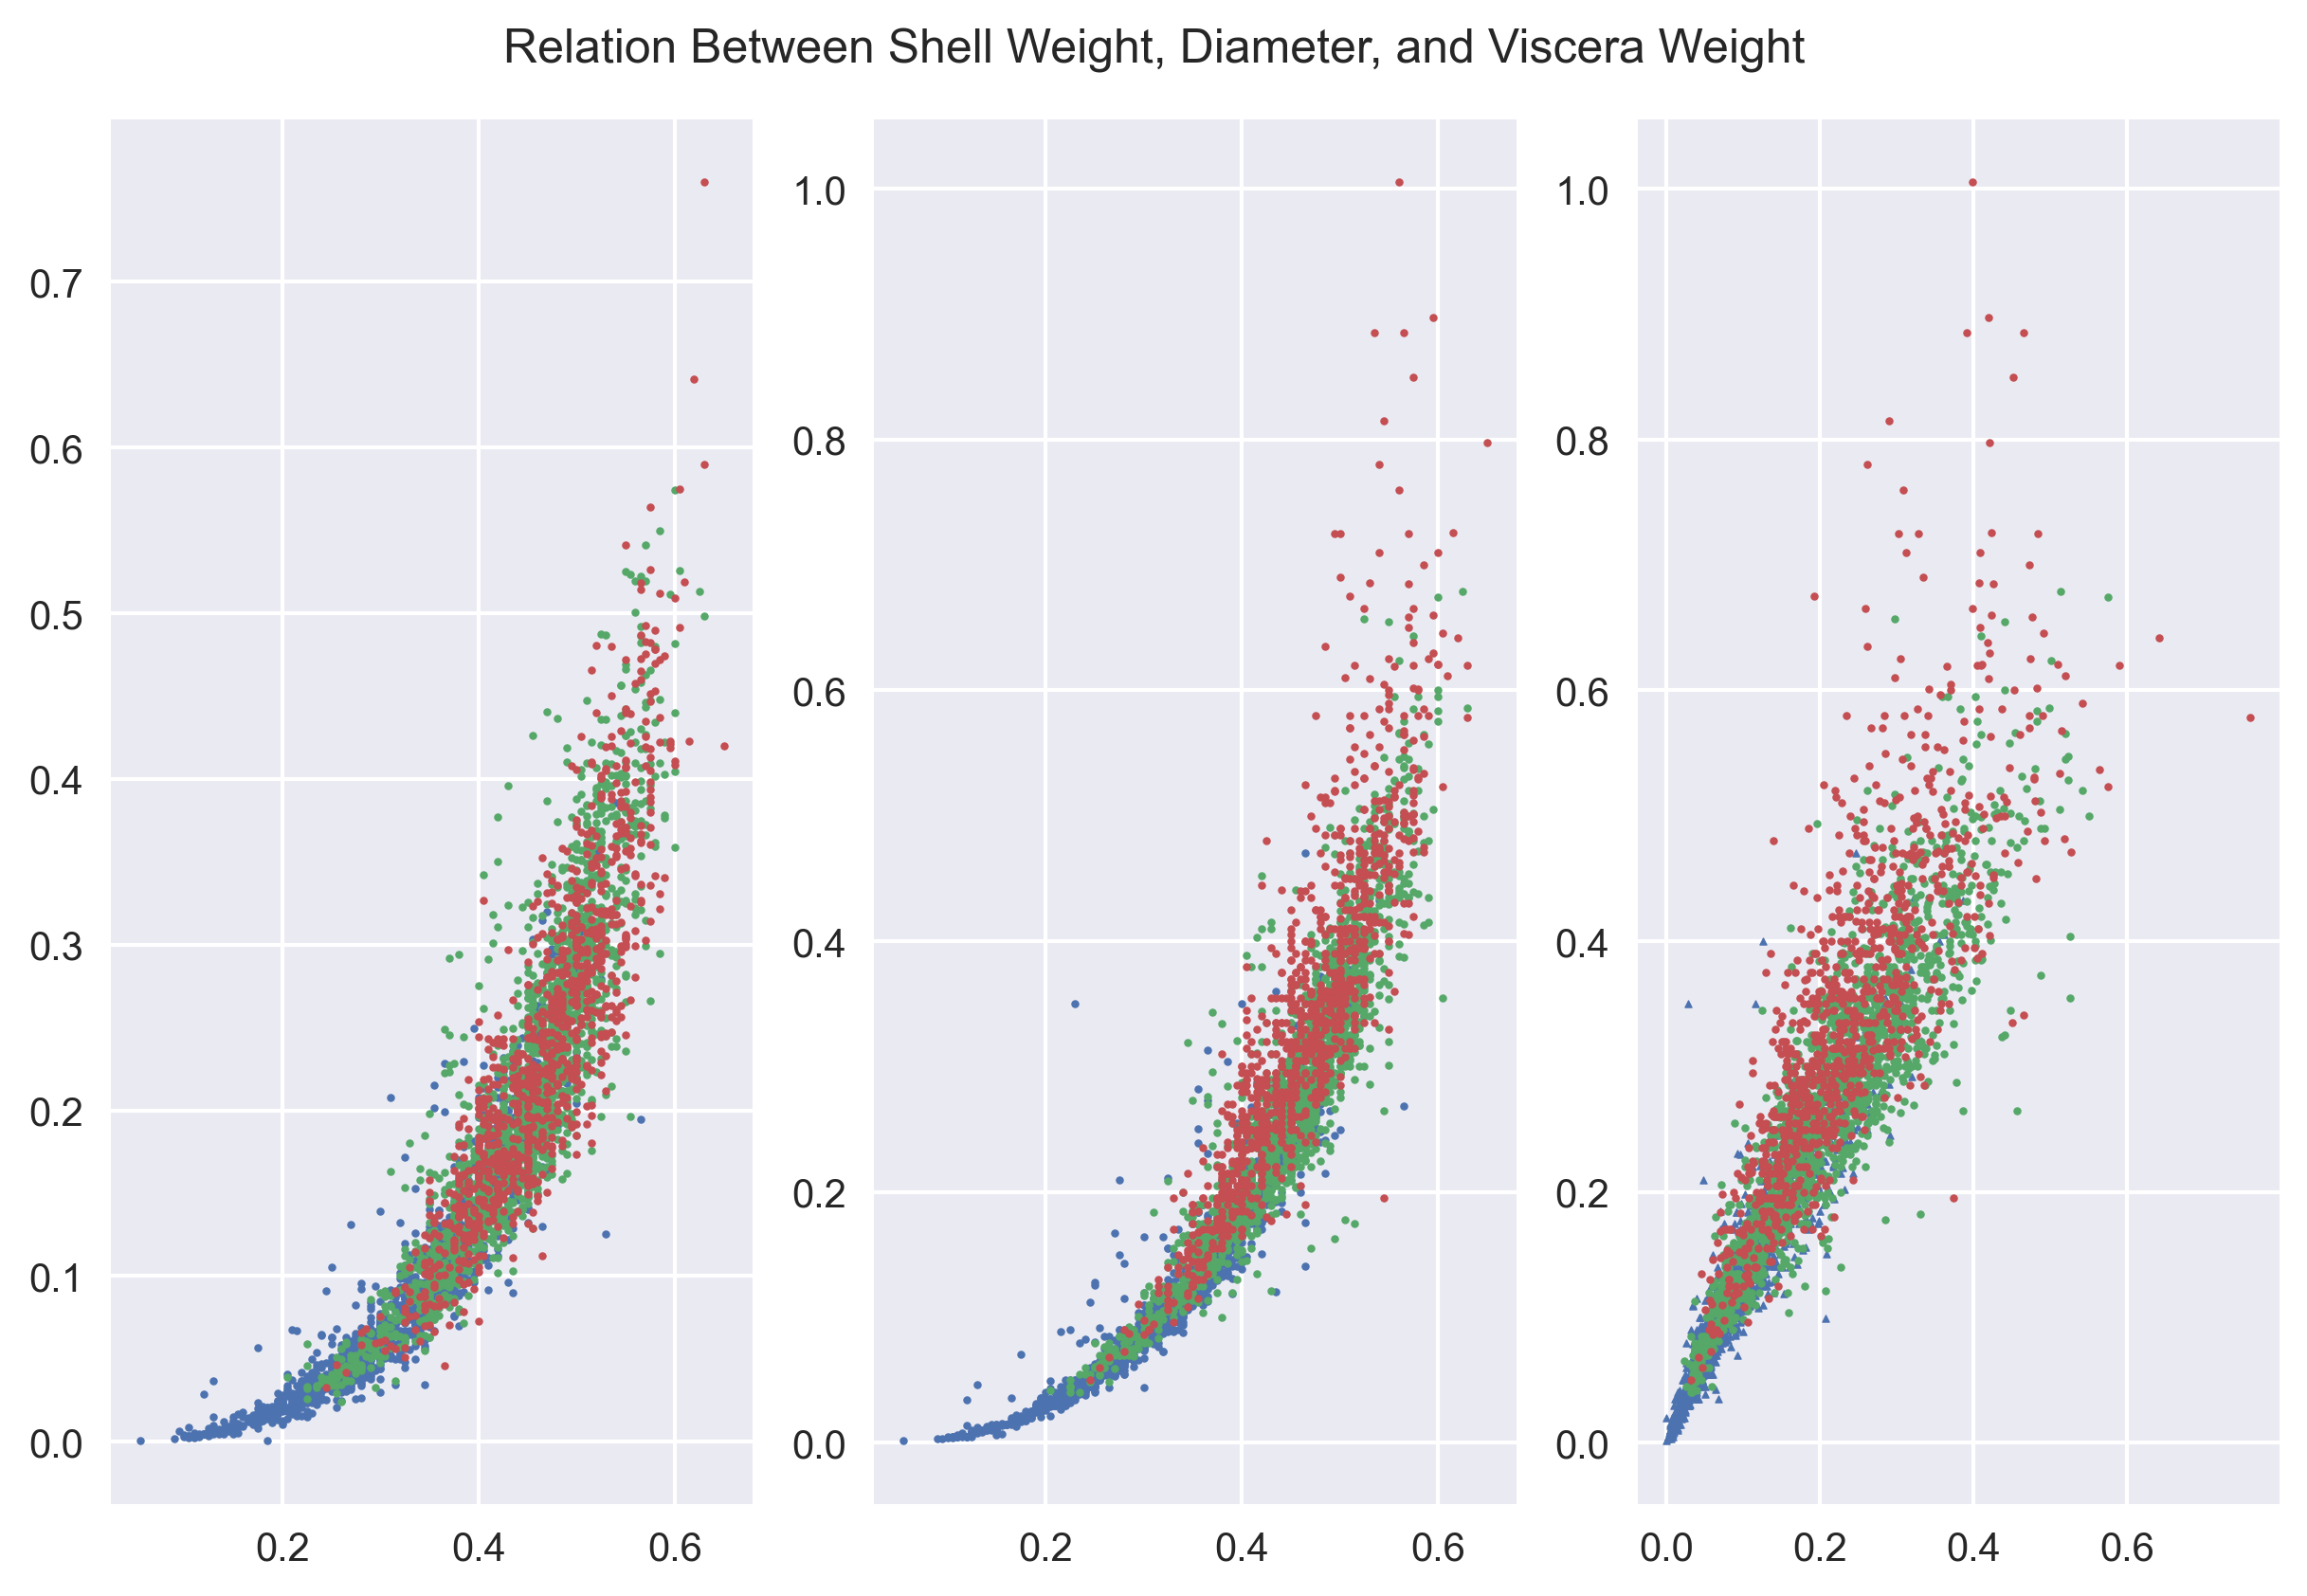

In [ ]:
import csv
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']= 300
import pandas as pd


# 1. Compute the mean value and standard deviation of the 7 numerical attributes


# 2. Compute the covariance matrix for each pair of the following attributes: 
# Length, Diameter, Shucked Weight, and Rings (treat this attribute as a continuous attribute);  
# next, compute the correlations for each of the 6 pairs of the 4 attributes. Interpret the statistical findings! 3 points
#
# 3. Create a scatter plot for the Shell weight and Length of your dataset. Interpret the scatter plot! 3 points
#
# 4. Create histograms for Diameter, Whole Weight, and Rings attributes for both the male and the female abalones; 
# interpret the obtained 6 histograms. 6 points 
#
# 5. Create box plots for the Whole Weight attribute for the instances of each age class—one for Y, M and O— and a fourth box plot for all instances in the dataset.
#  Interpret and compare the 4 box plots for each attribute! 4 points 
#
# 6. Create supervised scatter plots/supervised density plots for the following 3 pairs of attributes using the Age attribute as a class variable:
#  Diameter&Viscera Weight, Diameter&Shell Weight and Viscera Weight& Shell Weight.
#  Use different colors for the class variable. Interpret the obtained plots;
#  in particular address what can be said about the difficulty in predicting the correct age class and the distribution of the instances of the three classes. 6 points 
# 
#  7.Create 3 density plots for the instances of the 3 age classes in the Diameter/Shell Weight space. Compare the 3 density plots! 6 points 

#8. Create a new dataset ZAbalone from the YAbalone dataset by transforming the 7 continuous attributes into z-scores.
#  Fit a linear model that predicts the Rings attribute using the 7 z-scored, continuous attributes as the independent variables. 
# Report the R2 of the linear model and the coefficients of each attribute in the obtained regression function. 
# What do the obtained coefficients tell you about the importance of each attribute for predicting the number of rings of an abolone? 6 points 

# 9. Create 3 decision tree models with 20 or less nodes for the dataset (leaf nodes count; do not submit models with more than 20 nodes!);
#  use the age attribute as the class variable, and do not use the first and 9th attribute when building the decision tree model;
#  that is, the model uses attributes 2-8 to predict attribute 10! Explain how the 3 decision tree models were obtained!
#  Report the training accuracy and the testing accuracy of the submitted decision trees. 
# Interpret the learnt decision tree. What does it tell you about the importance of the 7 attributes for the classification problem? 9 points

#10. Write a conclusion (at most 13 sentences!) summarizing the most important findings of this task;
#  in particular address the findings obtained related to predicting the age of an abalone (the values of attributes 9 and 10) 
# using attributes 1-8.   6 points  (and up to 4 extra points) 

#

with open('abalone.csv','r') as csv_file:
    data = pd.read_csv(csv_file)
    #for line in data:
     #   print(line)
#print(data)

Length_M = data["Lenght"].mean()
Length_S = data["Lenght"].std()

Dia_M = data["Diameter"].mean()
Dia_S = data["Diameter"].std()

High_M = data["Height"].mean()
High_S = data["Height"].std()

W_M = data["Whole weight"].mean()
W_S = data["Whole weight"].std()

Sw_M = data["Shucked weight"].mean()
Sw_S = data["Shucked weight"].std()

Vw_M = data["Viscera weight"].mean()
Vw_S = data["Viscera weight"].std()

Shell_M = data["Shell weight"].mean()
Shell_S = data["Shell weight"].std()

rings_M = data["Rings"].mean()
rings_S = data["Rings"].std()

print(Length_M)
print(Dia_M)
# part 2
data_a = data.loc[:,['Lenght','Diameter','Shucked weight','Rings']]
#covariance matrix
data_a.cov()
#corelation
data_a.corr()

                                                    # part 3
                                                    #scatter plot of shell weight and length

plt.style.use('seaborn')
scat_w = data["Whole weight"]
scat_l = data["Lenght"]

plt.scatter(scat_w,scat_l,s=3,cmap="Qualitative",marker='v')
#plt.scatter(data.Age,data.Lenght,s=3)
plt.tight_layout
plt.title("Relation between shell weight and length")
plt.xlabel("Weight",)
plt.ylabel("Length")
#plt.xscale(2)

plt.show()

# 4
                                                    #4 - Histograms

#males
#Diameter

fig, (a1,a2,a3) = plt.subplots(nrows=3,ncols=1,constrained_layout=True)
males = data[data["Sex"] == "M"]
fig.suptitle("Males")
#ax1.hist(males["Diameter"])
a1.hist((males["Diameter"]))
a1.set_title("Diameter")

#plt.show()

#Whole Weight
a2.hist(males["Whole weight"])
a2.set_title("Weight")


#plt.show()

#Rings
a3.hist(males["Rings"])
a3.set_title("Rings")

plt.show()

#females
fig, (b1,b2,b3) = plt.subplots(nrows=3,ncols=1,constrained_layout=True)
females = data[data["Sex"] == "F"]
fig.suptitle("Females")
b1.hist(females["Diameter"])
b1.set_title("Diameter")


#Whole Weight
b2.hist(females["Whole weight"])
b2.set_title("Weight")


#Rings
b3.hist(females["Rings"])
b3.set_title("Rings")
plt.show()

                                                        #5 box plots

Y = data[data["Age"] == "Y"]
M = data[data["Age"] == "M"]
O = data[data["Age"] == "O"]

fig, (WW,YW,MW,OW) = plt.subplots(nrows=1,ncols=4,constrained_layout=True)
fig.suptitle("Weight Distribution of Abalone")
WW.boxplot(data["Whole weight"])

WW.set_title("All Abalone")


YW.boxplot(Y["Whole weight"])
YW.set_title("Young Abalone")


MW.boxplot(M["Whole weight"])
MW.set_title("Medium Abalone")


OW.boxplot(O["Whole weight"])
OW.set_title("Old Abalone")
plt.show()


                                            #supervised scatter plot
#using the Age attribute as a class variable:
#  Diameter&Viscera Weight, Diameter&Shell Weight and Viscera Weight& Shell Weight.

fig, (DV,DS,VS) = plt.subplots(nrows=1,ncols=3,constrained_layout=True)
fig.suptitle("Relation Between Shell Weight, Diameter, and Viscera Weight")

DV.scatter(Y.Diameter,Y["Viscera weight"],s=3)
DV.scatter(M.Diameter,M["Viscera weight"],s=3)
DV.scatter(O.Diameter,O["Viscera weight"],s=3)

DS.scatter(Y.Diameter,Y["Shell weight"],s=3)
DS.scatter(M.Diameter,M["Shell weight"],s=3)
DS.scatter(O.Diameter,O["Shell weight"],s=3)

VS.scatter(Y["Viscera weight"],Y["Shell weight"],s=3,marker='^')
VS.scatter(M["Viscera weight"],M["Shell weight"],s=3,)
VS.scatter(O["Viscera weight"],O["Shell weight"],s=3,)
